In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import  DecisionTreeClassifier
import sklearn.tree as tree

In [2]:
path= 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv'
df = pd.read_csv(path)
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.shape

(200, 6)

In [4]:
x=df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
x[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [5]:
from sklearn import preprocessing

le_sex=preprocessing.LabelEncoder()
le_sex.fit(['F','M'])
x[:,1]=le_sex.transform(x[:,1])

In [6]:
le_BP = preprocessing.LabelEncoder()
le_BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = le_BP.transform(x[:,2])

In [7]:
le_Chol = preprocessing.LabelEncoder()
le_Chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = le_Chol.transform(x[:,3])



In [8]:
x[0:5]

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043]], dtype=object)

In [10]:
y=df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

In [11]:
from sklearn.model_selection import train_test_split

In [18]:
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x,y,train_size=0.3, random_state=3)

In [19]:
print('shape of x_test set  {}'.format(x_testset.shape) ,'shape of y_test set {}'.format(y_testset.shape))

shape of x_test set  (140, 5) shape of y_test set (140,)


In [20]:
print('Shape of X training set {}'.format(x_trainset.shape),'&',' Size of Y training set {}'.format(y_trainset.shape))

Shape of X training set (60, 5) &  Size of Y training set (60,)


In [21]:
drugtree=DecisionTreeClassifier(criterion='entropy' , max_depth = 4)
drugtree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [22]:
drugtree.fit(x_trainset , y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [26]:
predtree =drugtree.predict(x_testset)
predtree[0:5]

array(['drugY', 'drugX', 'drugX', 'drugX', 'drugX'], dtype=object)

In [28]:
print (predtree [0:5])
print (y_testset [0:5])


['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


In [30]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [32]:
print('aaccuracy =',metrics.accuracy_score(y_testset , predtree))

aaccuracy = 0.9928571428571429


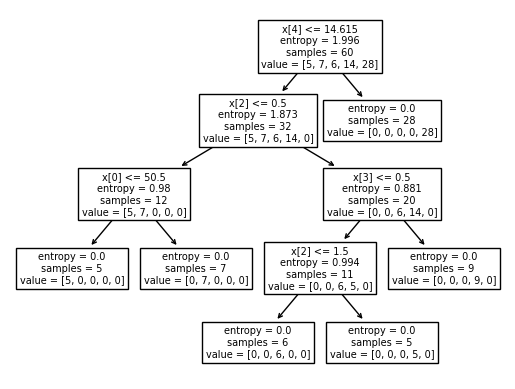

In [34]:
tree.plot_tree(drugtree)
plt.show()